In [1]:
import collections
import inspect

import numpy as np
import pandas as pd

import graphiclog

In [2]:
graphiclog.__file__, dir(graphiclog)

('/home/administrator/code/python/graphiclog/graphiclog/__init__.py',
 ['Bed',
  'BedSequence',
  '__builtins__',
  '__cached__',
  '__doc__',
  '__file__',
  '__loader__',
  '__name__',
  '__package__',
  '__path__',
  '__spec__',
  'bed',
  'defaults',
  'sequence',
  'utils',
  'wentworth'])

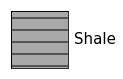

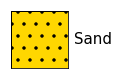

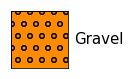

In [3]:
graphiclog.defaults.litholegend.plot()

In [4]:
transforms = {c : graphiclog.utils.string2array for c in ['depth_m', 'grain_size_mm']}

beds = pd.read_csv('../data/AllBedsWithProfiles.csv', converters=transforms)
beds.head()

,name,count,collection,eod,eodnum,tops,th,gs_tops_mm,snd_shl,mean_gs_mm,max_gs_mm,ng,ar,depth_m,grain_size_mm
0,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.81684,0.31082,0.115051,1.0,0.116073,0.117046,0.520514,0.021978,"[22.81684, 22.70297, 22.53372, 22.50602]","[0.115051, 0.1157124, 0.1170462, 0.1170462]"
1,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.50602,0.60931,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[22.50602, 21.89671]","[0.001, 0.001]"
2,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.89671,0.10463,0.125380,1.0,0.125380,0.125380,0.520514,0.021978,"[21.89671, 21.79208]","[0.1253796, 0.1253796]"
3,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.79208,0.11694,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[21.79208, 21.67514]","[0.001, 0.001]"
4,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.67514,0.13232,0.134306,1.0,0.150073,0.160420,0.520514,0.021978,"[21.67514, 21.63514, 21.56744, 21.54282]","[0.1343059, 0.1446953, 0.1604199, 0.1604199]"


In [5]:
for i, (name, grp) in enumerate(beds.groupby('name')):
    if i > 0:
        break
    
    bedseq = graphiclog.BedSequence.from_dataframe(grp, topcol='tops', thickcol='th',
                                         component_map=graphiclog.defaults.DEFAULT_COMPONENT_MAP,
                                         datacols=['th', 'mean_gs_mm', 'depth_m', 'grain_size_mm'],
                                         metacols=['name', 'collection', 'eod', 'eodnum'])
    
    print(bedseq.values, bedseq.metadata)
    

[[4.30171000e+00 1.90957896e-01 2.26699400e+02 1.09779500e-01]
 [4.30171000e+00 1.90957896e-01 2.26947100e+02 1.72378300e-01]
 [4.30171000e+00 1.90957896e-01 2.28003600e+02 1.85330900e-01]
 ...
 [8.59930000e-01 5.56285467e-03 1.03743400e+02 8.60539500e-03]
 [8.59930000e-01 5.56285467e-03 1.04019800e+02 9.45795000e-03]
 [8.59930000e-01 5.56285467e-03 1.04062800e+02 9.45795000e-03]] {'name': 'Amazon 931B', 'collection': 'Amazon', 'eod': 'fan', 'eodnum': 1}


/home/administrator/code/python/graphiclog/graphiclog/sequence.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['base'] = df[topcol] - df[thickcol]


In [6]:
beds[beds.name == 'Amazon 931B']

,name,count,collection,eod,eodnum,tops,th,gs_tops_mm,snd_shl,mean_gs_mm,max_gs_mm,ng,ar,depth_m,grain_size_mm
2836,Amazon 931B,63,Amazon,fan,1,103.20288,0.85993,0.001000,0.0,0.005563,0.009458,0.38992,0.07732,"[103.2029, 103.3933, 103.7434, 104.0198, 104.0...","[0.001, 0.001032119, 0.008605395, 0.00945795, ..."
2837,Amazon 931B,63,Amazon,fan,1,104.06281,0.52825,0.001000,0.0,0.001000,0.001000,0.38992,0.07732,"[104.0628, 104.5911]","[0.001, 0.001]"
2838,Amazon 931B,63,Amazon,fan,1,104.59106,0.86606,0.001000,NaN,NaN,NaN,0.38992,0.07732,"[104.5911, 104.7753, 105.1807, 105.4018, 105.4...","[0.001, nan, 0.00106296, 0.001100599, 0.001100..."
2839,Amazon 931B,63,Amazon,fan,1,105.45712,2.78249,0.001000,0.0,0.001000,0.001000,0.38992,0.07732,"[105.4571, 108.2396]","[0.001, 0.001]"
2840,Amazon 931B,63,Amazon,fan,1,108.23961,0.23341,0.001000,0.0,0.004058,0.009207,0.38992,0.07732,"[108.2396, 108.2826, 108.3379, 108.4362, 108.473]","[0.001, 0.001018396, 0.001091798, 0.009207256,..."
2841,Amazon 931B,63,Amazon,fan,1,108.47302,3.16332,0.001000,0.0,0.001000,0.001000,0.38992,0.07732,"[108.473, 111.6363]","[0.001, 0.001]"
2842,Amazon 931B,63,Amazon,fan,1,111.63634,0.37470,0.001000,0.0,0.003216,0.009053,0.38992,0.07732,"[111.6363, 111.8206, 111.9987, 112.011]","[0.001, 0.001077281, 0.009052955, 0.009052955]"
2843,Amazon 931B,63,Amazon,fan,1,112.01104,0.13514,0.001000,0.0,0.001000,0.001000,0.38992,0.07732,"[112.011, 112.1462]","[0.001, 0.001]"
2844,Amazon 931B,63,Amazon,fan,1,112.14618,0.19654,0.001000,0.0,0.004878,0.008952,0.38992,0.07732,"[112.1462, 112.1892, 112.3059, 112.3427]","[0.001, 0.00106296, 0.008951527, 0.008951527]"
2845,Amazon 931B,63,Amazon,fan,1,112.34272,0.42382,0.001000,0.0,0.001000,0.001000,0.38992,0.07732,"[112.3427, 112.7665]","[0.001, 0.001]"


In [7]:
len(bedseq), bedseq.nsamples, bedseq.nfeatures

(194, 709, 4)

In [8]:
bedseq[0]

Interval({'data': {'th': 4.30171000000001, 'mean_gs_mm': 0.190957896323552, 'depth_m': array([226.6994, 226.9471, 228.0036, 229.2566, 230.6264, 231.0011]), 'grain_size_mm': array([0.1097795, 0.1723783, 0.1853309, 0.1967622, 0.2108319, 0.2108319])}, 'top': Position({'middle': 226.69937000000002, 'units': 'm'}), 'base': Position({'middle': 222.39766, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'sand'})]})

In [9]:
bedseq[0].resample_data('depth_m', 0.5)
bedseq[0]

Interval({'data': {'th': 4.30171000000001, 'mean_gs_mm': 0.190957896323552, 'depth_m': array([226.69937, 226.08484, 225.47031, 224.85578, 224.24125, 223.62672,
       223.01219, 222.39766]), 'grain_size_mm': array([ 0.10977192, -0.04553224, -0.2008364 , -0.35614056, -0.51144472,
       -0.66674888, -0.82205304, -0.97735721])}, 'top': Position({'middle': 226.69937000000002, 'units': 'm'}), 'base': Position({'middle': 222.39766, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'sand'})]})

In [10]:
bedseq[0].max_field('grain_size_mm')

0.10977191839322238

In [11]:
bedseq.max_field('grain_size_mm')

0.2534653

In [12]:
x = np.array([0.1909579, 0.1909579, 0.1909579, 0.1909579, 0.1909579, 0.1909579, 0.1909579, 0.1909579])
np.unique(x)

array([0.1909579])

In [13]:
bedseq[-3]

Interval({'data': {'th': 0.866060000000004, 'mean_gs_mm': nan, 'depth_m': array([104.5911, 104.7753, 105.1807, 105.4018, 105.4571]), 'grain_size_mm': array([0.001     ,        nan, 0.00106296, 0.0011006 , 0.0011006 ])}, 'top': Position({'middle': 104.59106, 'units': 'm'}), 'base': Position({'middle': 103.725, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'gravel'})]})

In [14]:
bedseq[4]

Interval({'data': {'th': 0.6019499999999879, 'mean_gs_mm': 0.001, 'depth_m': array([225.0246, 225.6265]), 'grain_size_mm': array([0.001, 0.001])}, 'top': Position({'middle': 225.02455, 'units': 'm'}), 'base': Position({'middle': 224.42260000000002, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'shale'})]})

In [15]:
bedseq[4].values

array([[6.019500e-01, 1.000000e-03, 2.250246e+02, 1.000000e-03],
       [6.019500e-01, 1.000000e-03, 2.256265e+02, 1.000000e-03]])

In [16]:
bedseq[4].as_patch(graphiclog.defaults.litholegend, width_field='grain_size_mm', depth_field='depth_m')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
graphiclog.defaults.litholegend.plot()

In [ ]:
b = graphiclog.Bed(top=1.0, base=0.0, data={'a' : 1, 'b' : [1,2,3]})

In [ ]:
b

In [ ]:
b.values

In [ ]:
xp = np.arange(5,10)
fp = np.random.rand(5)

x = np.arange(10)

np.interp(x, xp, fp, left=np.nan, right=np.nan)